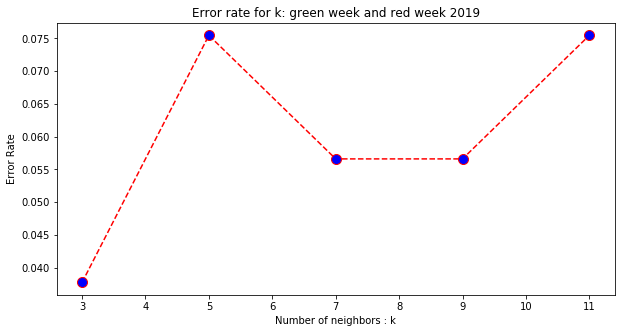

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from data_preparation import *

df = pd.read_csv("TSLA_weekly_return_volatility.csv")

# training
df_18 = year_data(df, 2018)
X_train = X(df_18)
Y_train = Y(df_18)

# testing
df_19 = year_data(df, 2019)
X_test = X(df_19)
Y_test = Y(df_19)

#scale
scale_X = StandardScaler().fit(X_train)
X_train = scale_X.transform(X_train)
X_test = scale_X.transform(X_test)

# test k
error_rate = []
for k in range (3, 12 ,2):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, Y_train)
    pred_y = knn_classifier.predict(X_test)
    error_rate.append(np.mean(pred_y != Y_test))
    
# plot k and error rate
fig = plt.figure(figsize =(10,5))
ax = plt.gca()
plt.plot(range (3,12,2), error_rate, c="r", marker="o", linestyle="--", 
         markerfacecolor="b", markersize=10)
plt.title("Error rate for k: green week and red week 2019")
plt.xlabel("Number of neighbors : k")
plt.ylabel("Error Rate")
plt.show()

### Through training 2018 data, the optimal k value for testing 2019 is 3. 